%matplotlib inline: Pour l'affichage des graphique sur jupyter

In [1]:
%matplotlib inline  
import numpy as np


In [2]:
#Import Pytorch
import torch
import torch.nn as nn 
import torch.optim as optim


In [3]:
# Parameters(figure size) : specify the size of my figures
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Fixer la graine (seed)
torch.manual_seed(1)

**Linear regression** 

Simple regression is a linear problem between continuous variables $x$ and $y$.Here, we write the model $y=2+0.5x$ and generate $y$ using an additional Gaussian standard random noise.


Text(0, 0.5, 'y')

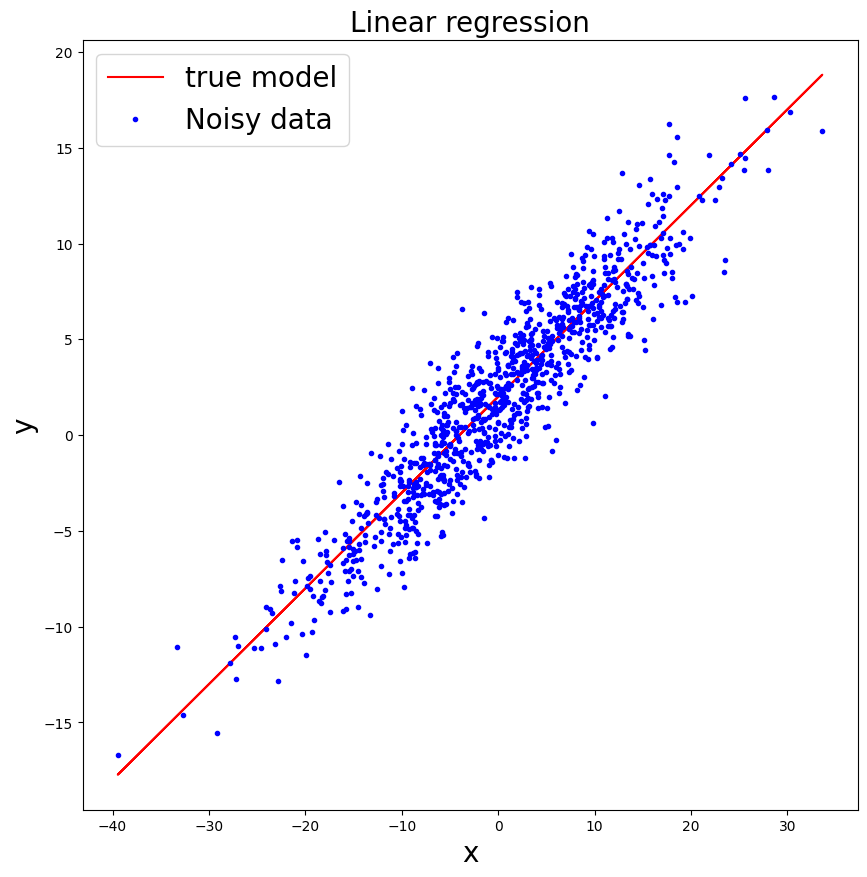

In [5]:
#Generate data 
x = torch.randn(1000,1) * 10 #Input variable (1000 lignes et 1 colonne)
# x est sous forme d'un tenseur 
y_true = 2 + 0.5*x #True model
y = y_true + torch.randn(1000,1) * 2 # Add noise to the truth

#Plot noise and data true model
plot(x, y_true, 'r')
plot(x, y, 'b.')
legend(['true model', 'Noisy data'], prop={'size':20})
title('Linear regression', size=20)
xlabel('x', size = 20)
ylabel('y', size = 20)

The objective is to build a neural network to fit the relationship between $x$ and $y$. In Pytorch, it is necessary to create a specific class for each neural network architecture. Below, we declare the neural network corresponding to a linear regression.

In [6]:
#Declare a class for linear regression
class linear_regression_nn(nn.Module):

    #class initialization
    def __init__(self, input_size, output_size):
        super(linear_regression_nn, self).__init__()
        #fully connected layer with linear activation
        self.fc = nn.Linear(input_size, output_size)

    # function to apply the neural network 
    def forward(self, x):
        y_pred = self.fc(x)
        return y_pred
    

Then, we create a neural network based on the specific architecture declared above. We finally check the values of the parameters (randomly generated).

In [7]:
#Create the neural network (1 input size for x and 1 output size for y, bias is declared by default)
linear_regression_model = linear_regression_nn(1,1)

#Print the model architecture
print(linear_regression_model)

#Print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print("Slope: ", slope)
print("Bias: ", bias)


linear_regression_nn(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
Slope:  Parameter containing:
tensor([[0.0292]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.5334], requires_grad=True)


In order to quantify the quality of the fit given by my neural network, we define a loss function. For a regression problem, the classic loss function is the MSE.
Then, to compute the gradient of the loss function w.r.t the parameters of the neural network, we use an optimization technique. A classic one is the Stochastic Gradient Descent.

In [8]:
#Loss function
criterion = nn.MSELoss()
#Optimizer: new_parameters = old_parameters - lr * gradient, with lr the learning rate
optimizer = torch.optim.SGD(linear_regression_model.parameters(), lr=0.001)


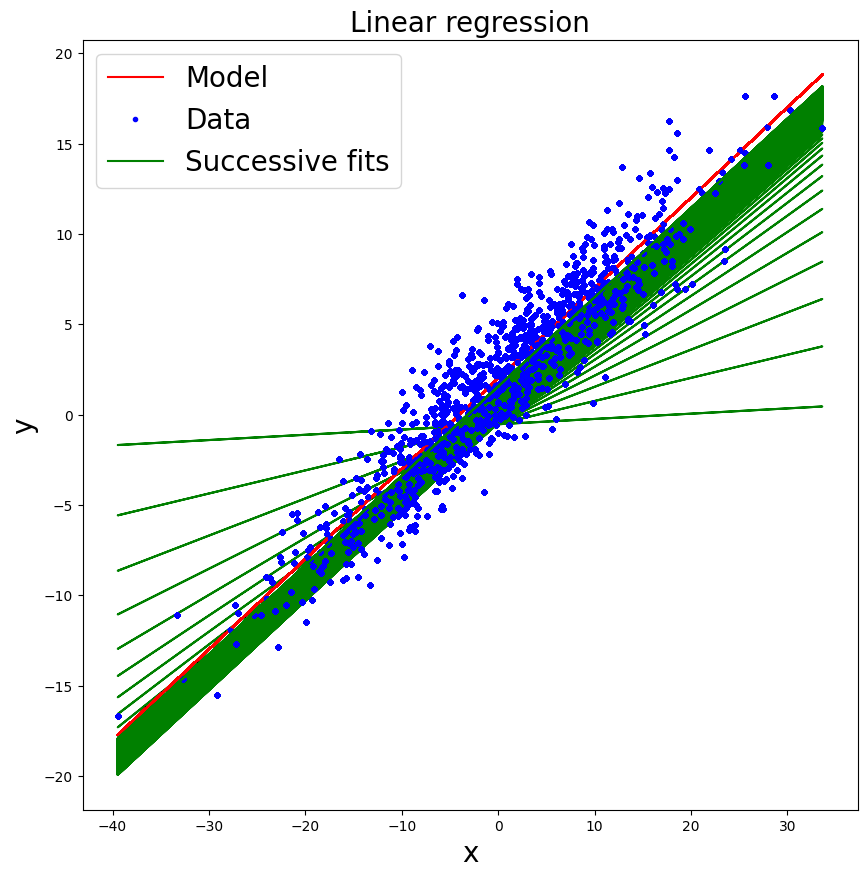

In [9]:
epochs = 1000 # number of epochs
losses = [] #List to stock the loss at each iteration

for i in range(epochs):

    #compute the prediction using the current parameters of the neural network
    y_pred = linear_regression_model.forward(x)

    #Compute loss and stock it
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())

    #initialize the gradient to zero
    optimizer.zero_grad()

    #compute the gradient by back propagation
    loss.backward()

    #update the parameter values using the gradient
    optimizer.step()

    #plot  at each epoch
    plot(x, y_true, "r")
    plot(x, y, "b.")
    plot(x, y_pred.detach().numpy(), "g")
    legend(["Model", "Data", "Successive fits"], prop={"size": 20})
    title("Linear regression", size=20)
    xlabel("x", size=20)
    ylabel("y", size=20)

Text(0, 0.5, 'Loss value')

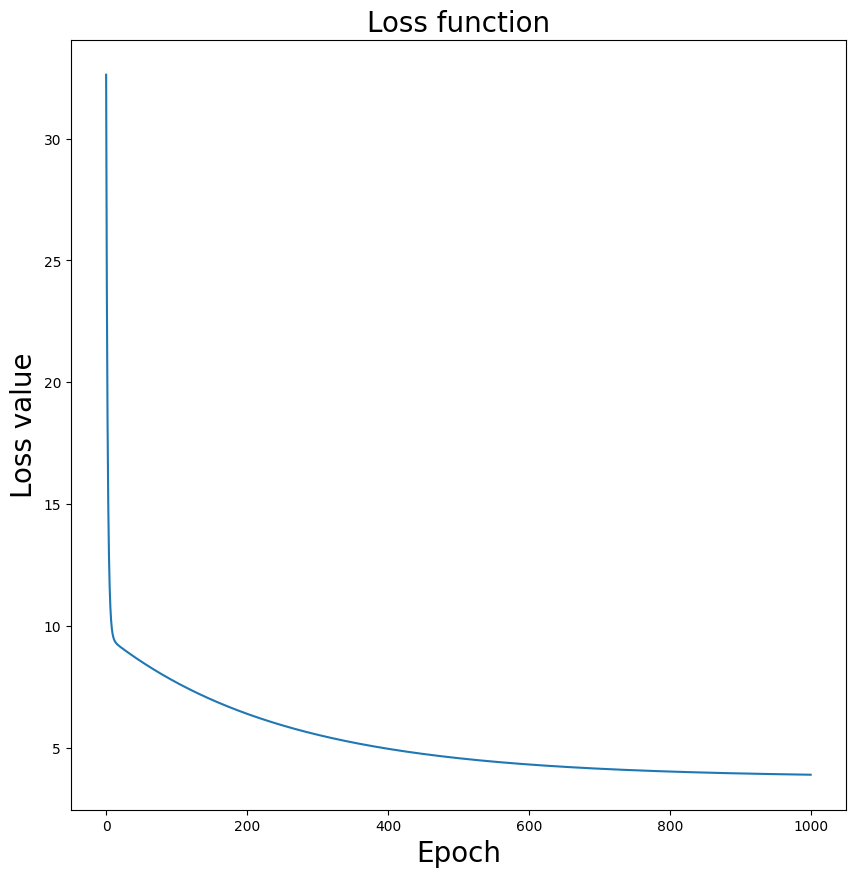

In [10]:
# Print the loss function
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

In [11]:
# Extract and print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print('Slope: ', slope)
print('Bias: ', bias)

Slope:  Parameter containing:
tensor([[0.4941]], requires_grad=True)
Bias:  Parameter containing:
tensor([1.5506], requires_grad=True)


**Nonlinear regression**
Now, we perform a multiple regression between continuous variabkes $x$ ans $y$. Here, we write the non linear model $y=2+0.5x-0.05x^2$ and generate y using an additional Gaussian standard random noise.

Text(0, 0.5, 'y')

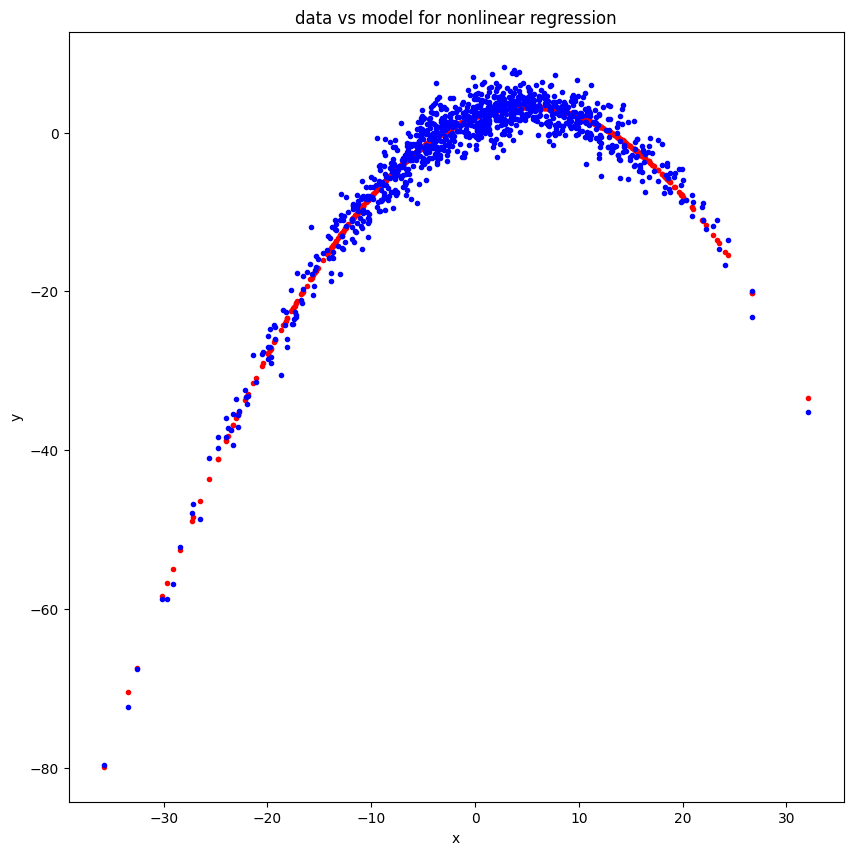

In [12]:
#generate data
x = torch.randn(1000,1)*10
y_true = 2 + 0.5*x - 0.05*x**2
y = y_true + torch.randn(1000, 1)*2

plot(x,y_true,"r.")
plot(x,y, "b.")
title("data vs model for nonlinear regression")
xlabel("x")
ylabel("y")

In [13]:
# Declare a class for nonlinear regression
class nonlinear_regression_nn(nn.Module):
    
    # class initialization
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc0 = nn.Linear(input_size, hidden_size)
        # ReLu activation
        self.relu = nn.ReLU()
        # fully connected layer with linear activation
        self.fc1 = nn.Linear(hidden_size, output_size)
        
    # function to apply the neural network
    def forward(self, x):
        out = self.fc0(x)
        out = self.relu(out)
        y_pred = self.fc1(out)
        return y_pred
    
# Create the neural network (1 input size for x, 6 neurons in the hidden layer, and 1 output size for y)
nonlinear_regression_model = nonlinear_regression_nn(1, 6, 1)

In [14]:
# Print the model parameters (weights of the neural network)
for name, param in nonlinear_regression_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc0.weight tensor([[-0.7187],
        [-0.3857],
        [-0.2343],
        [-0.5503],
        [-0.1648],
        [ 0.6943]])
fc0.bias tensor([ 0.5165, -0.6734,  0.6508,  0.2039,  0.1187,  0.0865])
fc1.weight tensor([[-0.2019, -0.3385,  0.0936,  0.3533, -0.3352,  0.3632]])
fc1.bias tensor([0.2127])


In [15]:
# Loss function: MSE = sum [(y - y_pred)^2]
criterion = nn.MSELoss()

# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(nonlinear_regression_model.parameters(), lr = 0.001)

In [16]:
epochs = 20000 # number of epochs
losses = [] # list to stock the loss at each iteration

# Loop on epochs
for i in range(epochs):
    
    # compute the prediction using the previous parameters of the neural network
    y_pred = nonlinear_regression_model.forward(x)
    
    # compute and stock the loss
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())
    
    # initialize the gradient to zero
    optimizer.zero_grad()
    
    # compute the gradient by back propagation
    loss.backward()
    
    # update the parameter values using the gradient
    optimizer.step()

Text(0, 0.5, 'Loss value')

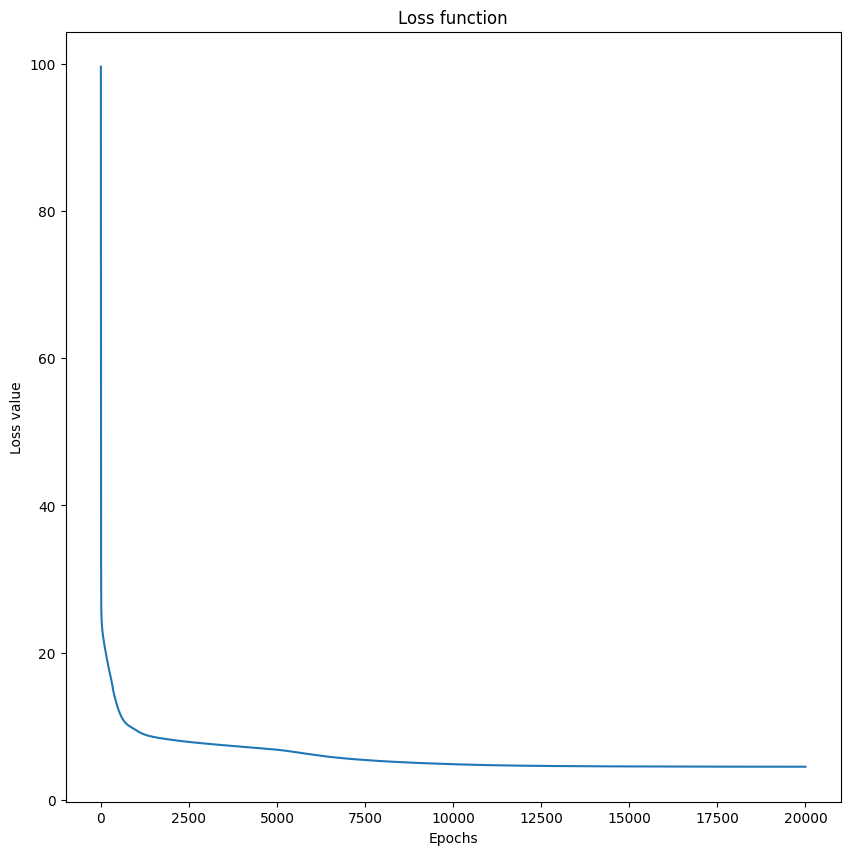

In [17]:
#Print the loss function
plot(range(epochs), losses)
title("Loss function")
xlabel("Epochs")
ylabel("Loss value")


Text(0, 0.5, 'y')

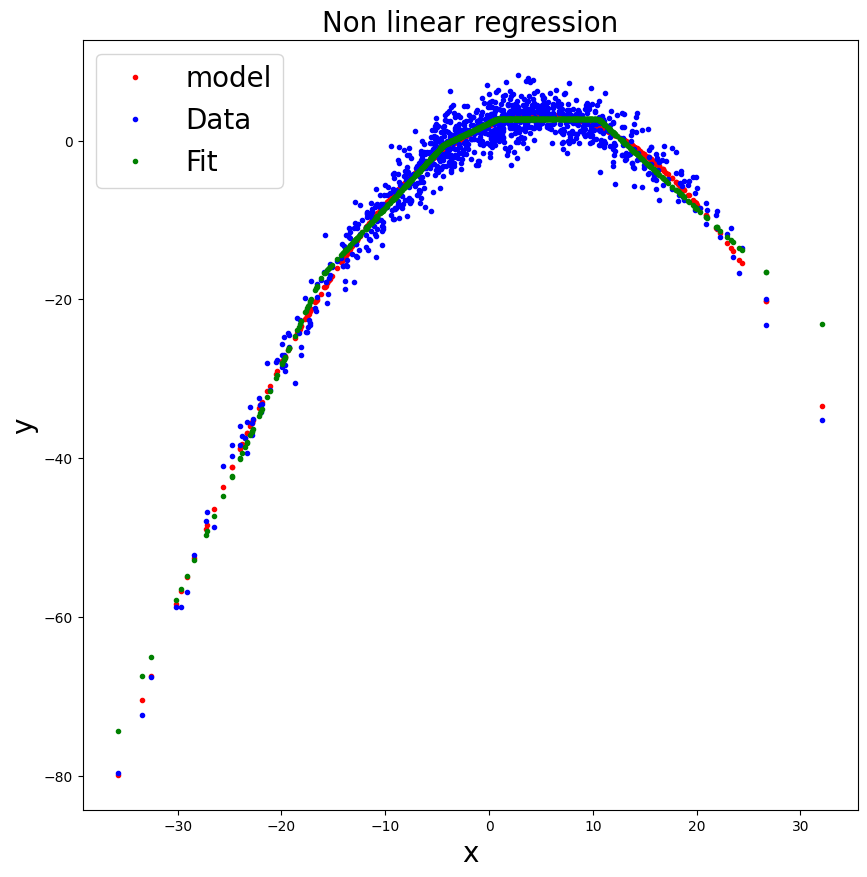

In [18]:
plot(x, y_true, 'r.')
plot(x, y, 'b.')
plot(x, y_pred.detach().numpy(), 'g.')
legend(['model', 'Data', 'Fit'], prop={'size':20})
title('Non linear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

**Logistic regression(Binary classification)** 

In a classification problem, $y$ is a discrete variable with various classes. Here, $y$ is binary and takes its values between 0 and 1. We write model as $y = f\left(2+0.5x\right)$ with $f$ the logistic transfer function (sigmoid).
As previously, we generate $y$ adding Gaussian perturbations.


Text(0, 0.5, 'y')

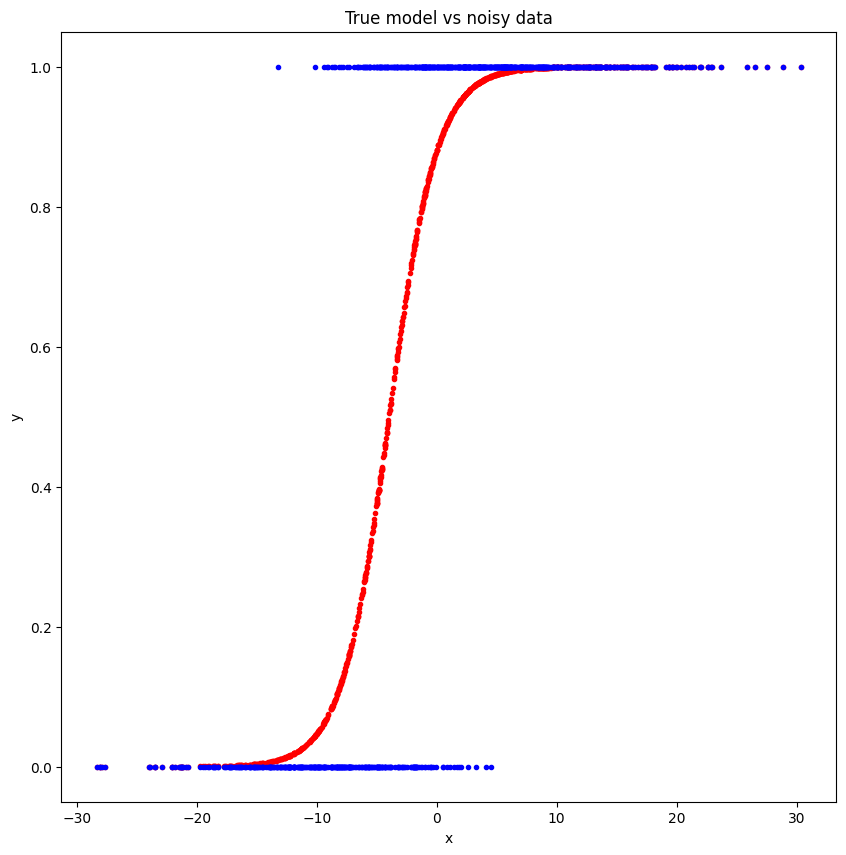

In [19]:
#Generate data
x = torch.randn(1000,1)*10 #Input variable
y_true = 1 / (1 + exp(-(2 + 0.5 * x))) #True variable
y_noisy = 1 / (1 + exp(-(2 + 0.5 * x)+ torch.randn(1000,1)*2)) #Noisy data
y = (y_noisy>0.5).float() #Transform to binary data 
#print(y)
#Plot noisy data and true model
plot(x, y_true, 'r.')
plot(x, y, 'b.')
title("True model vs noisy data")
xlabel("x")
ylabel("y")
       

In [20]:
#Define our model
class binary_classification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(binary_classification, self).__init__()
        self.fc0 = nn.Linear(input_size, hidden_size) #equivalent to Dense(input_size, hidden_size) julia
        self.fc1 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out = self.fc0(x)
        out = self.fc1(out)
        y_pred = torch.sigmoid(out)
        return y_pred
        
    

In [21]:
model = binary_classification(1, 6, 1)
model.named_parameters

<bound method Module.named_parameters of binary_classification(
  (fc0): Linear(in_features=1, out_features=6, bias=True)
  (fc1): Linear(in_features=6, out_features=1, bias=True)
)>

In [22]:
#Loss function
criterion = nn.BCELoss() #Binary Cross Entropy: L(y, y') = - [y * log(y') + (1 - y) * log(1 - y')]

In [23]:
#L'optimisation
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [27]:
losses = []
epochs = 1000
for i in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y_noisy)
    losses.append(loss.detach().numpy())

    #Initilialize the gradient to zero
    optimizer.zero_grad()

    #Back propagation
    loss.backward()

    #update the parameter values using the gradient
    optimizer.step()
    if i%10 == 0:
        print(loss)

with torch.no_grad():
    y_pred = model(x)
    y_pred_classes = (y_pred > 0.5).float()
accuracy = torch.mean((y_pred_classes == y).float())
print(accuracy)

tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3113, grad_fn=<Bina

Text(0, 0.5, 'Loss function')

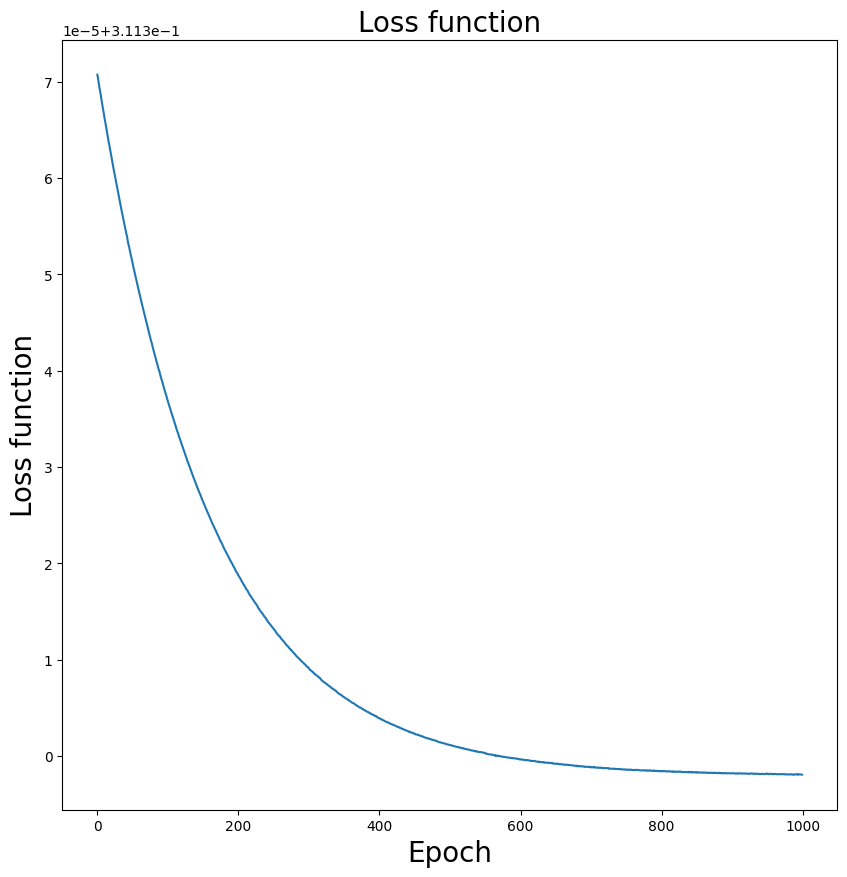

In [28]:
#loss function
plot(range(epochs), losses)
title('Loss function', size = 20)
xlabel('Epoch', size=20)
ylabel('Loss function', size=20)

Below,we define a sigmoid function, well known in neural networks, especially for classification problems. The analytic derivative of the sigmoid function is also defined.

In [30]:
#Define the sigmoid function
def f(x):
    return torch.sigmoid(x)
def f_prime(x):
    return torch.exp(-x)/ (1 + torch.exp(-x))**2

In [32]:
#Generate data
x = torch.linspace(-5.0, 5.0, 100, requires_grad=True)
f_x = f(x)
f_prime_x = f_prime(x)

#Apply the automatic differentiation
y1=f(x)
y1.backward()
derivative = x.grad

RuntimeError: grad can be implicitly created only for scalar outputs

In [33]:
import torch

# Define the sigmoid function
def f(x):
    return torch.sigmoid(x)

# Create a tensor with a value at which you want to compute the derivative
x = torch.tensor(1.0, requires_grad=True)

# Apply the sigmoid function
y = f(x)

# Use autograd to compute the gradient
y.backward()

# The gradient is stored in x.grad
derivative = x.grad

print(derivative.item())  # Print the derivative


0.1966119259595871
